# **IMPORT DATA**

**Mengimport & menampilkan file presiden.csv yang hendak di Bersihkan**


In [1]:
import pandas as pd

presiden = pd.read_csv('presiden.csv')
print(presiden.head())

   conversation_id_str                      created_at  favorite_count  \
0  1901933401986482568  Tue Mar 18 09:47:13 +0000 2025           23885   
1  1902550244065472726  Thu Mar 20 02:38:20 +0000 2025            1099   
2  1902578069271101443  Thu Mar 20 04:28:54 +0000 2025            5630   
3  1902660923359469787  Thu Mar 20 09:58:08 +0000 2025             192   
4  1902153731120271613  Wed Mar 19 00:22:44 +0000 2025             990   

                                           full_text               id_str  \
0  Turun sekarang sebelum terlambat. @prabowo @gi...  1901933401986482568   
1  Banyak teman-teman yg #TolakRUUTNI #TolakDwifu...  1902550244065472726   
2  PUAS LO SEMUA YANG PENGEN PILIH PRESIDEN MILIT...  1902578069271101443   
3                 #TimnasDay https://t.co/5ATjlkTpc1  1902660923359469787   
4  Pesan Cinta Untuk Presiden Prabowo Dari Seoran...  1902153731120271613   

                                           image_url in_reply_to_screen_name  \
0  https://p

Kode tersebut digunakan untuk membaca file CSV bernama presiden.csv dan menampilkannya. Pertama, pandas diimpor sebagai pd, lalu file CSV dibaca menggunakan pd.read_csv() dan disimpan ke dalam variabel presiden. Terakhir, presiden.head() digunakan untuk menampilkan 5 baris pertama dari data tersebut sebagai tampilan awal isi dataset.

**Menampilkan struktur kolom dari data tersebut**

In [2]:
presiden.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   conversation_id_str      213 non-null    int64 
 1   created_at               213 non-null    object
 2   favorite_count           213 non-null    int64 
 3   full_text                213 non-null    object
 4   id_str                   213 non-null    int64 
 5   image_url                178 non-null    object
 6   in_reply_to_screen_name  5 non-null      object
 7   lang                     213 non-null    object
 8   location                 144 non-null    object
 9   quote_count              213 non-null    int64 
 10  reply_count              213 non-null    int64 
 11  retweet_count            213 non-null    int64 
 12  tweet_url                213 non-null    object
 13  user_id_str              213 non-null    int64 
 14  username                 213 non-null    o

----

# **Tahapan Cleaning Data**

**Menampilkan isi kolom full_text yang berisi cuitan2 masyarakat**

In [3]:
presiden["full_text"]

,full_text
0,Turun sekarang sebelum terlambat. @prabowo @gi...
1,Banyak teman-teman yg #TolakRUUTNI #TolakDwifu...
2,PUAS LO SEMUA YANG PENGEN PILIH PRESIDEN MILIT...
3,#TimnasDay https://t.co/5ATjlkTpc1
4,Pesan Cinta Untuk Presiden Prabowo Dari Seoran...
...,...
208,Presiden @prabowo disebut tidak perhatian pada...
209,malah nyalahin pemilih 02 ya salahin nomer 2 ...
210,Pemerintah Indonesia tengah mempersiapkan skem...
211,Pesantren dan Madrasah selalu dianaktirikan ol...


**Membuat Sebuah fungsi cleaning untuk membersihkan simbol-simbol yang tidak penting/tak digunakan**

In [4]:
#membuat function cleaning

import re
def clean(s):
    s = s.replace(r'<lb>', "\n")
    s = s.replace(r'<tab>', "\i")
    s = re.sub(r'<br */*>', "\n", s)
    s = s.replace("&lt;", "<").replace("&gt;", ">").replace("&amp;", "&")
    s = s.replace("&amp;", "&")
    # markdown urls
    s = re.sub(r'\(https*://[^\)]*\)', "", s)
    # normal urls
    s = re.sub(r'https*://[^\s]*', "", s)
    s = re.sub(r'_+', ' ', s)
    s = re.sub(r'"+', '"', s)
    return str(s)

fungsi ini membantu menghasilkan teks yang lebih bersih dan rapi sehingga lebih siap untuk dianalisis atau diproses lebih lanjut dalam tahapan seperti tokenisasi, analisis sentimen, atau pemodelan teks.

**Menyimpan hasilnya dalam sebuah variabel yang baru**

In [5]:
presiden["text_clean"] = ''

Kode jokowi["text_clean"] = '' digunakan untuk menambahkan kolom baru bernama text_clean ke dalam DataFrame jokowi, dan mengisinya dengan nilai kosong (string kosong) untuk setiap baris.

In [6]:
for i, row in presiden.iterrows():
    presiden.at[i, "text_clean"] = clean(row.full_text)

Kode berikut digunakan untuk mengisi kolom text_clean pada DataFrame jokowi dengan hasil dari fungsi clean() yang diterapkan pada setiap baris kolom full_text.

**Menampilkan 5 data teratas**

In [7]:
presiden.head()

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username,text_clean
0,1901933401986482568,Tue Mar 18 09:47:13 +0000 2025,23885,Turun sekarang sebelum terlambat. @prabowo @gi...,1901933401986482568,https://pbs.twimg.com/amplify_video_thumb/1901...,NaN,in,Alone with the Alone,301,372,8336,https://x.com/Kodokodar/status/190193340198648...,1263992626723696640,Kodokodar,Turun sekarang sebelum terlambat. @prabowo @gi...
1,1902550244065472726,Thu Mar 20 02:38:20 +0000 2025,1099,Banyak teman-teman yg #TolakRUUTNI #TolakDwifu...,1902550244065472726,https://pbs.twimg.com/ext_tw_video_thumb/19025...,NaN,in,Indonesia,19,116,489,https://x.com/Anak__Ogi/status/190255024406547...,1356517931887120384,Anak__Ogi,Banyak teman-teman yg #TolakRUUTNI #TolakDwifu...
2,1902578069271101443,Thu Mar 20 04:28:54 +0000 2025,5630,PUAS LO SEMUA YANG PENGEN PILIH PRESIDEN MILIT...,1902578069271101443,NaN,NaN,in,Wallachia,57,42,1486,https://x.com/necromanticcs/status/19025780692...,1307076292794224640,necromanticcs,PUAS LO SEMUA YANG PENGEN PILIH PRESIDEN MILIT...
3,1902660923359469787,Thu Mar 20 09:58:08 +0000 2025,192,#TimnasDay https://t.co/5ATjlkTpc1,1902660923359469787,https://pbs.twimg.com/media/GmecBuwagAAJMlU.jpg,NaN,qme,BARUS,5,21,56,https://x.com/PresidenKopi/status/190266092335...,1021329195329179648,PresidenKopi,#TimnasDay
4,1902153731120271613,Wed Mar 19 00:22:44 +0000 2025,990,Pesan Cinta Untuk Presiden Prabowo Dari Seoran...,1902153731120271613,https://pbs.twimg.com/ext_tw_video_thumb/19021...,NaN,in,NaN,17,58,474,https://x.com/Bang_Ramzan/status/1902153731120...,1433433068283392007,Bang_Ramzan,Pesan Cinta Untuk Presiden Prabowo Dari Seoran...


**Membandingkan data sebelum di clean dan setelah di clean**

Fungsi pd.set_option('display.max_colwidth', None) digunakan untuk menampilkan seluruh isi kolom teks tanpa dipotong saat DataFrame ditampilkan. Secara default, pandas memotong (truncate) teks yang terlalu panjang dan menggantinya dengan ... agar tampilan lebih ringkas.

In [8]:
# Menampilkan seluruh isi kolom tanpa dipotong
pd.set_option('display.max_colwidth', None)

# Kemudian panggil ulang data
presiden[["full_text", "text_clean"]].head()


,full_text,text_clean
0,Turun sekarang sebelum terlambat. @prabowo @gibran_tweet Pilih mundur sekarang dan kabur saja dari Indonesia sambil menanggung malu dan dosa yang masih sedikit atau maju terus sebagai presiden (diktator) yang mematikan total satu Indonesia? Rasa sakit nanti amat panjang. https://t.co/ilWFNwzjxu,Turun sekarang sebelum terlambat. @prabowo @gibran tweet Pilih mundur sekarang dan kabur saja dari Indonesia sambil menanggung malu dan dosa yang masih sedikit atau maju terus sebagai presiden (diktator) yang mematikan total satu Indonesia? Rasa sakit nanti amat panjang.
1,Banyak teman-teman yg #TolakRUUTNI #TolakDwifungsiABRI heran dgn kejadian pagi ini gedung DPR yg banyak di jaga tentara mereka bertanya apa rezim ingin perang dgn rakyat? Mereka lupa presiden saat ini adlh Prabowo yg menurut @kangdede78 adlh pembunuh penculik dan pelanggar https://t.co/Bf8APm5Hi0,Banyak teman-teman yg #TolakRUUTNI #TolakDwifungsiABRI heran dgn kejadian pagi ini gedung DPR yg banyak di jaga tentara mereka bertanya apa rezim ingin perang dgn rakyat? Mereka lupa presiden saat ini adlh Prabowo yg menurut @kangdede78 adlh pembunuh penculik dan pelanggar
2,PUAS LO SEMUA YANG PENGEN PILIH PRESIDEN MILITER???,PUAS LO SEMUA YANG PENGEN PILIH PRESIDEN MILITER???
3,#TimnasDay https://t.co/5ATjlkTpc1,#TimnasDay
4,Pesan Cinta Untuk Presiden Prabowo Dari Seorang Srikandi Yang Mencintai Negeri Ini... https://t.co/41W6JUc7uH,Pesan Cinta Untuk Presiden Prabowo Dari Seorang Srikandi Yang Mencintai Negeri Ini...


# **NLTK Process**

NLTK processing adalah serangkaian teknik dari pustaka NLTK (Natural Language Toolkit) untuk membersihkan dan menganalisis teks bahasa alami, seperti tokenisasi, stemming, dan penghapusan stop words. Proses ini membantu menyiapkan data teks agar lebih mudah dianalisis dalam tugas-tugas seperti klasifikasi atau analisis sentimen.

**Menginstal Natural Language Toolkit**

In [9]:
pip install nltk

**mengunduh dataset**

In [10]:
#tokenisasi
import nltk
nltk.download('punkt_tab')
from nltk.tokenize import sent_tokenize,word_tokenize

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Contoh proses tokenisasi dalam bahasa inggris

In [11]:
example_text = "Hello there, how are you doing today? The weather is great today. The sky is blue. python is awsome"
print(sent_tokenize(example_text))
print(word_tokenize(example_text))

['Hello there, how are you doing today?', 'The weather is great today.', 'The sky is blue.', 'python is awsome']
['Hello', 'there', ',', 'how', 'are', 'you', 'doing', 'today', '?', 'The', 'weather', 'is', 'great', 'today', '.', 'The', 'sky', 'is', 'blue', '.', 'python', 'is', 'awsome']


**melakukan tokenisasi pada data yang telah di clean & membandingkan data sebelum di tokenisasi dan setelah di tokenisasi**

In [12]:
# Tokenisasi kata pada kolom 'text_clean'
presiden['tokenized_text'] = presiden['text_clean'].apply(lambda x: word_tokenize(x))

# Menampilkan beberapa baris pertama data dengan kolom tokenized_text
print(presiden[['text_clean', 'tokenized_text']].head())


                                                                                                                                                                                                                                                                           text_clean  \
0    Turun sekarang sebelum terlambat. @prabowo @gibran tweet Pilih mundur sekarang dan kabur saja dari Indonesia sambil menanggung malu dan dosa yang masih sedikit atau maju terus sebagai presiden (diktator) yang mematikan total satu Indonesia? Rasa sakit nanti amat panjang.    
1  Banyak teman-teman yg #TolakRUUTNI #TolakDwifungsiABRI heran dgn kejadian pagi ini gedung DPR yg banyak di jaga tentara mereka bertanya apa rezim ingin perang dgn rakyat? Mereka lupa presiden saat ini adlh Prabowo yg menurut @kangdede78 adlh pembunuh penculik dan pelanggar    
2                                                                                                                                                            

Menampilkan 5 data teratas setelah tokenisasi

In [13]:
presiden["tokenized_text"].head()

,tokenized_text
0,"[Turun, sekarang, sebelum, terlambat, ., @, prabowo, @, gibran, tweet, Pilih, mundur, sekarang, dan, kabur, saja, dari, Indonesia, sambil, menanggung, malu, dan, dosa, yang, masih, sedikit, atau, maju, terus, sebagai, presiden, (, diktator, ), yang, mematikan, total, satu, Indonesia, ?, Rasa, sakit, nanti, amat, panjang, .]"
1,"[Banyak, teman-teman, yg, #, TolakRUUTNI, #, TolakDwifungsiABRI, heran, dgn, kejadian, pagi, ini, gedung, DPR, yg, banyak, di, jaga, tentara, mereka, bertanya, apa, rezim, ingin, perang, dgn, rakyat, ?, Mereka, lupa, presiden, saat, ini, adlh, Prabowo, yg, menurut, @, kangdede78, adlh, pembunuh, penculik, dan, pelanggar]"
2,"[PUAS, LO, SEMUA, YANG, PENGEN, PILIH, PRESIDEN, MILITER, ?, ?, ?]"
3,"[#, TimnasDay]"
4,"[Pesan, Cinta, Untuk, Presiden, Prabowo, Dari, Seorang, Srikandi, Yang, Mencintai, Negeri, Ini, ...]"


**Mengimport stopwords yang ada dalam bahasa indonesia**

In [14]:
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words_indonesia = stopwords.words('indonesian')

stop_words_indonesia

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['ada',
 'adalah',
 'adanya',
 'adapun',
 'agak',
 'agaknya',
 'agar',
 'akan',
 'akankah',
 'akhir',
 'akhiri',
 'akhirnya',
 'aku',
 'akulah',
 'amat',
 'amatlah',
 'anda',
 'andalah',
 'antar',
 'antara',
 'antaranya',
 'apa',
 'apaan',
 'apabila',
 'apakah',
 'apalagi',
 'apatah',
 'artinya',
 'asal',
 'asalkan',
 'atas',
 'atau',
 'ataukah',
 'ataupun',
 'awal',
 'awalnya',
 'bagai',
 'bagaikan',
 'bagaimana',
 'bagaimanakah',
 'bagaimanapun',
 'bagi',
 'bagian',
 'bahkan',
 'bahwa',
 'bahwasanya',
 'baik',
 'bakal',
 'bakalan',
 'balik',
 'banyak',
 'bapak',
 'baru',
 'bawah',
 'beberapa',
 'begini',
 'beginian',
 'beginikah',
 'beginilah',
 'begitu',
 'begitukah',
 'begitulah',
 'begitupun',
 'bekerja',
 'belakang',
 'belakangan',
 'belum',
 'belumlah',
 'benar',
 'benarkah',
 'benarlah',
 'berada',
 'berakhir',
 'berakhirlah',
 'berakhirnya',
 'berapa',
 'berapakah',
 'berapalah',
 'berapapun',
 'berarti',
 'berawal',
 'berbagai',
 'berdatangan',
 'beri',
 'berikan',
 'berikut'

Contoh penerapan stopwords dalam bahasa inggris

In [15]:
from nltk.corpus import stopwords
text = 'he is a good boy. he is very good in coding'
text = word_tokenize(text)
text_with_no_stopwords = [word for word in text if word not in stopwords.words('english')]
text_with_no_stopwords

['good', 'boy', '.', 'good', 'coding']

**Mengambil stopwords Indonesia, lalu menerapkan fungsi remove stopwords ke data yang telah di tokenisasi sebelumnya dan menampilkan hasilnya.**

In [16]:
stop_words_indonesia = stopwords.words('indonesian')

def remove_stopwords(token_list):
  return [word for word in token_list if word.lower() not in stop_words_indonesia]

presiden['tokenized_stopwords'] = presiden['tokenized_text'].apply(remove_stopwords)

presiden[['tokenized_text', 'tokenized_stopwords']].head()

,tokenized_text,tokenized_stopwords
0,"[Turun, sekarang, sebelum, terlambat, ., @, prabowo, @, gibran, tweet, Pilih, mundur, sekarang, dan, kabur, saja, dari, Indonesia, sambil, menanggung, malu, dan, dosa, yang, masih, sedikit, atau, maju, terus, sebagai, presiden, (, diktator, ), yang, mematikan, total, satu, Indonesia, ?, Rasa, sakit, nanti, amat, panjang, .]","[Turun, terlambat, ., @, prabowo, @, gibran, tweet, Pilih, mundur, kabur, Indonesia, menanggung, malu, dosa, maju, presiden, (, diktator, ), mematikan, total, Indonesia, ?, sakit, .]"
1,"[Banyak, teman-teman, yg, #, TolakRUUTNI, #, TolakDwifungsiABRI, heran, dgn, kejadian, pagi, ini, gedung, DPR, yg, banyak, di, jaga, tentara, mereka, bertanya, apa, rezim, ingin, perang, dgn, rakyat, ?, Mereka, lupa, presiden, saat, ini, adlh, Prabowo, yg, menurut, @, kangdede78, adlh, pembunuh, penculik, dan, pelanggar]","[teman-teman, yg, #, TolakRUUTNI, #, TolakDwifungsiABRI, heran, dgn, kejadian, pagi, gedung, DPR, yg, jaga, tentara, rezim, perang, dgn, rakyat, ?, lupa, presiden, adlh, Prabowo, yg, @, kangdede78, adlh, pembunuh, penculik, pelanggar]"
2,"[PUAS, LO, SEMUA, YANG, PENGEN, PILIH, PRESIDEN, MILITER, ?, ?, ?]","[PUAS, LO, PENGEN, PILIH, PRESIDEN, MILITER, ?, ?, ?]"
3,"[#, TimnasDay]","[#, TimnasDay]"
4,"[Pesan, Cinta, Untuk, Presiden, Prabowo, Dari, Seorang, Srikandi, Yang, Mencintai, Negeri, Ini, ...]","[Pesan, Cinta, Presiden, Prabowo, Srikandi, Mencintai, Negeri, ...]"


Contoh penerapan stemming

In [17]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()    ## Creating an object for porterstemmer
example_words = ['earn',"earning","earned","earns"]  ##Example words
for w in example_words:
    print(ps.stem(w))

earn
earn
earn
earn


**Menginstal paket yang dibutuhkan**

In [18]:
!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.7 MB/s eta 0:00:00


Setelah paket stemming diimpor, dibuatlah objek stemmer sebagai alat untuk mengubah kata-kata dalam teks menjadi bentuk dasarnya (root word). Proses ini dilakukan setelah teks melalui tahap penghapusan stopwords, yaitu kata-kata umum yang tidak memiliki makna penting dalam analisis. Dengan menerapkan fungsi stemming pada data yang sudah bersih, setiap kata akan disederhanakan agar lebih konsisten dan mudah dianalisis, terutama untuk keperluan klasifikasi, pencarian, atau analisis teks lebih lanjut, lalu hasilnya ditampilkan untuk memastikan proses berjalan sesuai harapan.

In [19]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemming_sastrawi(token_list):
  return [stemmer.stem(word) for word in token_list]

presiden['stemmed_words'] = presiden['tokenized_stopwords'].apply(stemming_sastrawi)

presiden[['tokenized_stopwords', 'stemmed_words']]

,tokenized_stopwords,stemmed_words
0,"[Turun, terlambat, ., @, prabowo, @, gibran, tweet, Pilih, mundur, kabur, Indonesia, menanggung, malu, dosa, maju, presiden, (, diktator, ), mematikan, total, Indonesia, ?, sakit, .]","[turun, lambat, , , prabowo, , gibran, tweet, pilih, mundur, kabur, indonesia, tanggung, malu, dosa, maju, presiden, , diktator, , mati, total, indonesia, , sakit, ]"
1,"[teman-teman, yg, #, TolakRUUTNI, #, TolakDwifungsiABRI, heran, dgn, kejadian, pagi, gedung, DPR, yg, jaga, tentara, rezim, perang, dgn, rakyat, ?, lupa, presiden, adlh, Prabowo, yg, @, kangdede78, adlh, pembunuh, penculik, pelanggar]","[teman, yg, , tolakruutni, , tolakdwifungsiabri, heran, dgn, jadi, pagi, gedung, dpr, yg, jaga, tentara, rezim, perang, dgn, rakyat, , lupa, presiden, adlh, prabowo, yg, , kangdede78, adlh, bunuh, culik, langgar]"
2,"[PUAS, LO, PENGEN, PILIH, PRESIDEN, MILITER, ?, ?, ?]","[puas, lo, ken, pilih, presiden, militer, , , ]"
3,"[#, TimnasDay]","[, timnasday]"
4,"[Pesan, Cinta, Presiden, Prabowo, Srikandi, Mencintai, Negeri, ...]","[pesan, cinta, presiden, prabowo, srikandi, cinta, negeri, ]"
...,...,...
208,"[Presiden, @, prabowo, perhatian, dunia, pendidikan, yg, beliau, mendengarkan, masukan, dr, rektor, usulan, menaikkan, dana, riset, pengembangan, utk, bekerjasama, BUMN, nyata, hasilnya, paham, fungsi, efisiensi, utk]","[presiden, , prabowo, perhati, dunia, didik, yg, beliau, dengar, masuk, dr, rektor, usul, naik, dana, riset, kembang, utk, bekerjasama, bumn, nyata, hasil, paham, fungsi, efisiensi, utk]"
209,"[nyalahin, pemilih, 02, ya, salahin, nomer, 2, nya, PEMILIHNYA, KONTOL, 02, JDI, PRESIDEN, KARNA, LU, MILIH, BEGO, .., LU, PIKIR, 02, PRESIDEN, GARA, ?, ?, HOMPIMPA, ?, ?, GOBLOK, OTAK, IDOT, BGT, NAJIS]","[nyalahin, pilih, 02, ya, salahin, nomer, 2, nya, pilih, kontol, 02, jdi, presiden, karna, lu, milih, bego, , lu, pikir, 02, presiden, gara, , , hompimpa, , , goblok, otak, idot, bgt, najis]"
210,"[Pemerintah, Indonesia, skema, pembentukan, Koperasi, Desa, Merah, Putih, Presiden, Prabowo, Subianto, menginstruksikan, pembentukannya, rapat, Istana, Kepresidenan, ~SA, #, Koperasi, #, KoperasiMerahPutri, #, PrabowoSubianto]","[perintah, indonesia, skema, bentuk, koperasi, desa, merah, putih, presiden, prabowo, subianto, instruksi, bentuk, rapat, istana, presiden, sa, , koperasi, , koperasimerahputri, , prabowosubianto]"
211,"[Pesantren, Madrasah, dianaktirikan, negara, ., Semoga, keluhan, kiai, Menag, Presiden, @, prabowo]","[pesantren, madrasah, dianaktirikan, negara, , moga, keluh, kiai, menag, presiden, , prabowo]"


**Analisis Sentimen untuk variabel stemmed_word**

Analisis sentimen dilakukan terhadap variabel stemmed_word untuk mengidentifikasi kecenderungan opini pengguna berdasarkan kata-kata yang telah melalui proses stemming.

In [20]:
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.8 MB/s eta 0:00:00


**Inisialisasi objek SentimentIntensityAnalyzer**

Objek SentimentIntensityAnalyzer diinisialisasi untuk menganalisis polaritas sentimen dari setiap kata yang telah distemming pada variabel stemmed_word, di mana inisialisasi ini memungkinkan sistem menghitung skor sentimen menggunakan pendekatan leksikal dari VADER (Valence Aware Dictionary and sEntiment Reasoner).

In [21]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

def analyze_sentiment(text_list):
    # Gabungkan list token menjadi satu string
    text = " ".join(text_list)

    # Lakukan analisis sentimen
    scores = analyzer.polarity_scores(text)

    # Kembalikan nilai compound score
    return scores['compound']

# Terapkan fungsi analyze_sentiment ke kolom 'stemmed_words'
presiden['sentiment_score'] = presiden['stemmed_words'].apply(analyze_sentiment)

**Menampilkan beberapa baris pertama data dengan kolom sentiment_score**

In [23]:
print(presiden[['stemmed_words', 'sentiment_score']].head())

                                                                                                                                                                                                          stemmed_words  \
0                                                 [turun, lambat, , , prabowo, , gibran, tweet, pilih, mundur, kabur, indonesia, tanggung, malu, dosa, maju, presiden, , diktator, , mati, total, indonesia, , sakit, ]   
1  [teman, yg, , tolakruutni, , tolakdwifungsiabri, heran, dgn, jadi, pagi, gedung, dpr, yg, jaga, tentara, rezim, perang, dgn, rakyat, , lupa, presiden, adlh, prabowo, yg, , kangdede78, adlh, bunuh, culik, langgar]   
2                                                                                                                                                                       [puas, lo, ken, pilih, presiden, militer, , , ]   
3                                                                                                                           

**Membuat label setiap komentar**

Setelah memperoleh skor sentimen pada masing-masing komentar, langkah selanjutnya adalah membuat label sentimen berdasarkan nilai dari sentiment_score. Fungsi label_sentiment() didefinisikan untuk mengelompokkan skor ke dalam tiga kategori, yaitu 'negatif' untuk skor kurang dari 0, 'netral' untuk skor sama dengan 0, dan 'positif' untuk skor lebih dari 0. Fungsi ini kemudian diterapkan pada kolom sentiment_score untuk menghasilkan kolom baru bernama sentiment_label, yang berisi klasifikasi sentimen dari tiap komentar. Hasilnya ditampilkan dengan menampilkan beberapa baris pertama dari kolom stemmed_words, sentiment_score, dan sentiment_label.

In [24]:
# Fungsi untuk menentukan label sentimen berdasarkan sentiment_score
def label_sentiment(score):
    if score < 0:
        return 'negatif'
    elif score == 0:
        return 'netral'
    else:
        return 'positif'

# Buat kolom baru 'sentiment_label' berdasarkan kolom 'sentiment_score'
presiden['sentiment_label'] = presiden['sentiment_score'].apply(label_sentiment)

# Menampilkan beberapa baris pertama data dengan kolom sentiment_label
print(presiden[['stemmed_words', 'sentiment_score', 'sentiment_label']].head())

                                                                                                                                                                                                          stemmed_words  \
0                                                 [turun, lambat, , , prabowo, , gibran, tweet, pilih, mundur, kabur, indonesia, tanggung, malu, dosa, maju, presiden, , diktator, , mati, total, indonesia, , sakit, ]   
1  [teman, yg, , tolakruutni, , tolakdwifungsiabri, heran, dgn, jadi, pagi, gedung, dpr, yg, jaga, tentara, rezim, perang, dgn, rakyat, , lupa, presiden, adlh, prabowo, yg, , kangdede78, adlh, bunuh, culik, langgar]   
2                                                                                                                                                                       [puas, lo, ken, pilih, presiden, militer, , , ]   
3                                                                                                                           

**Membuat grafik plot**

Grafik di bawah merupakan visualisasi distribusi sentimen yang terbagi menjadi tiga kategori, yaitu netral, negatif, dan positif. Dari grafik tersebut terlihat bahwa sebagian besar komentar tergolong ke dalam sentimen netral, diikuti oleh sentimen negatif, dan hanya sebagian kecil yang termasuk ke dalam sentimen positif. Hal ini menunjukkan bahwa persepsi atau tanggapan terhadap topik yang dianalisis cenderung tidak menunjukkan opini yang kuat, baik dalam arah positif maupun negatif.

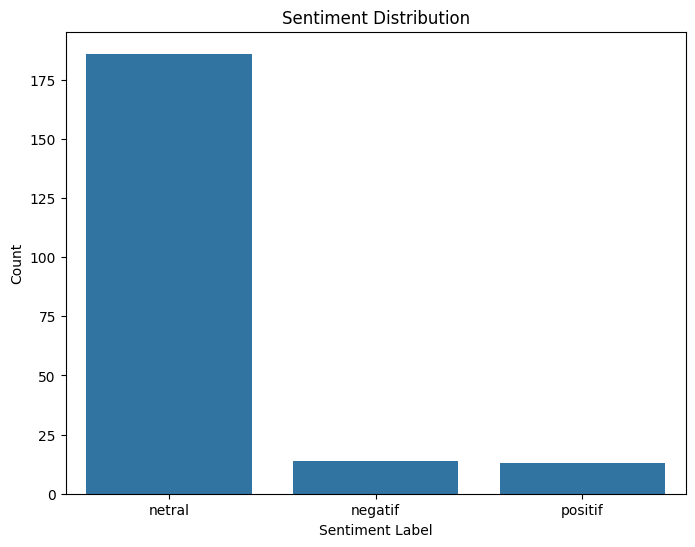

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the bar chart
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment_label', data=presiden)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
plt.show()

**Buat word cloud dari setiap kategori**

dengan langkah pertama mengintal wordcloud

In [27]:
!pip install wordcloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt

**Group data by sentiment label**

berikut group data untuk kategori negatif,netral,positif

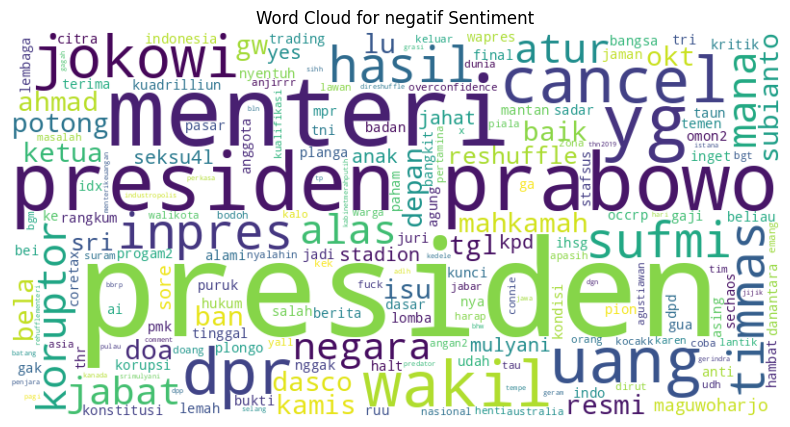

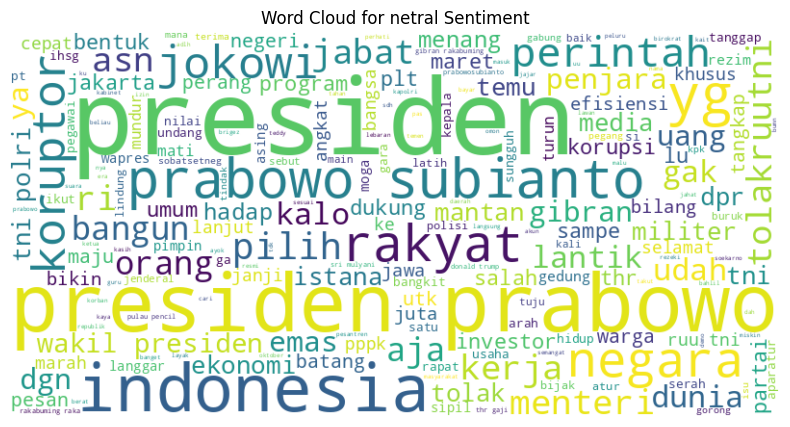

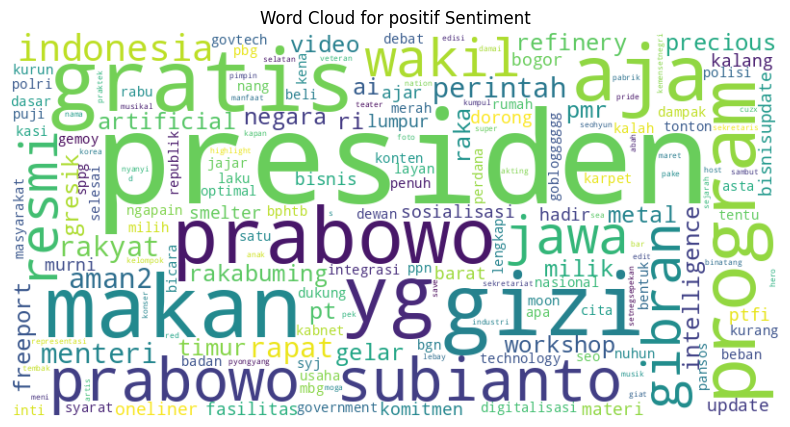

In [29]:
sentiment_groups = presiden.groupby('sentiment_label')

# Create word clouds for each sentiment category
for sentiment, group in sentiment_groups:
    # Combine all stemmed words in the group
    all_words = ' '.join([' '.join(words) for words in group['stemmed_words']])

    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

    # Display the generated image:
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f'Word Cloud for {sentiment} Sentiment')
    plt.show()

**Berikut penjelasan masing-masing kategori word cloud**

**1. sentimen Negatif**

Word cloud pada kategori sentimen negatif menunjukkan kata-kata yang sering muncul dalam komentar yang bernada kritis atau tidak puas terhadap isu politik dan pemerintahan. Kata-kata seperti presiden, menteri, prabowo, jokowi, dpr, dan wakil menjadi pusat perhatian, menandakan adanya ketidakpuasan terhadap tokoh-tokoh publik. Selain itu, kata-kata seperti cancel, korupsi, jahat, dan resign memperkuat nuansa negatif dalam wacana yang dibahas. Komentar-komentar ini umumnya mengandung kritik terhadap kebijakan, keputusan politik, atau perilaku pejabat yang dianggap bermasalah oleh masyarakat.

**2. sentimen netral**

kata-kata yang muncul lebih bersifat informatif dan deskriptif tanpa muatan emosi yang kuat. Kata seperti presiden, prabowo, jokowi, rakyat, jabatan, dan negara mendominasi, menunjukkan bahwa diskusi berfokus pada peristiwa politik, kebijakan pemerintah, dan tokoh publik dengan gaya penyampaian yang lebih objektif. Istilah seperti lantik, program, kerja, dan perintah menunjukkan narasi tentang aktivitas pemerintahan yang disampaikan secara faktual. Ini menandakan bahwa komentar dalam kategori ini lebih menekankan pada penyampaian informasi atau opini tanpa kecenderungan emosi positif maupun negatif.

**3. Sentimen Positif**
Word cloud pada kategori sentimen positif memperlihatkan dominasi kata-kata yang menunjukkan dukungan, pujian, dan apresiasi terhadap kebijakan atau tokoh pemerintahan. Kata-kata seperti presiden, prabowo, gibran, gratis, makan, gizi, dan program mencerminkan persepsi positif masyarakat terhadap inisiatif pemerintah, seperti bantuan sosial atau program gizi. Selain itu, kata-kata seperti resmi, rapat, optimal, dan digitalisasi menggambarkan respon baik terhadap kerja birokrasi dan inovasi teknologi. Hal ini menunjukkan bahwa komentar dalam kategori ini berasal dari pengguna yang memberikan penilaian positif atas tindakan atau kebijakan tertentu.

